<a href="https://colab.research.google.com/github/bonsoirpedro/AluraStore_Challenge/blob/main/AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ImportaÃ§Ã£o dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    PreÃ§o      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritÃ³rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  AvaliaÃ§Ã£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      JoÃ£o Souza              DF                    1   
3     03/05/2022      JoÃ£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. AnÃ¡lise do faturamento


In [ ]:

#Primeiro vamos criar uma lista das lojas, para poder usar laÃ§o e evitar muitas linhas
lista_lojas = [loja, loja2, loja3, loja4]  # Cada item Ã© um df
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
lista_faturamento = []

# Loop sobre os DataFrames
for loja in lista_lojas:
    faturamento_loja = float(loja['PreÃ§o'].sum())
    lista_faturamento.append(faturamento_loja)

# Monta dicionÃ¡rio para organizar por chave e valor
dicionario_faturamento = dict(zip(nomes_lojas, lista_faturamento))

# Exibe os faturamentos brutos do maior para o menor
for loja, faturamento in sorted(dicionario_faturamento.items(), key=lambda x: x[1], reverse=True):
    print(f'\nðŸ“Š O faturamento bruto da {loja.lower()} foi de R${faturamento:.2f}')


ðŸ“Š O faturamento bruto da loja 1 foi de R$1534509.12

ðŸ“Š O faturamento bruto da loja 2 foi de R$1488459.06

ðŸ“Š O faturamento bruto da loja 3 foi de R$1464025.03

ðŸ“Š O faturamento bruto da loja 4 foi de R$1384497.58


# 2. Vendas por Categoria


In [ ]:
# Primeiro tentei agrupar todos os dados em uma lista mas ficou poluido, decidi explorar o df
df_vendas_categoria = pd.DataFrame()

# Loop sobre as lojas e agrupar as vendas por categoria
for i, loja in enumerate(lista_lojas):
    qtd_produtos_categoria = loja['Categoria do Produto'].value_counts()  # Conta as vendas por categoria
    df_vendas_categoria[nomes_lojas[i]] = qtd_produtos_categoria  # Adiciona no DataFrame (similar ao .append)

# Ordenar as categorias de cada loja pela quantidade de vendas (do maior para o menor)
df_vendas_categoria = df_vendas_categoria.sort_values(by=nomes_lojas[0], ascending=False)

# Exibe o DataFrame de vendas por categoria
print("ðŸ“Š Vendas por Categoria em cada Loja:")
print(df_vendas_categoria)

# Exibe as 5 categorias mais populares por loja
for loja, qtd in df_vendas_categoria.items():
    print(f'\nðŸ“Œ {loja} - Top 5 categorias:')
    top_5 = qtd.head(5)  # Filtra as 5 mais populares
    for categoria, total in top_5.items():
        print(f'  ðŸ›’ {categoria.title()}: {total} vendas')

ðŸ“Š Vendas por Categoria em cada Loja:
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201

ðŸ“Œ Loja 1 - Top 5 categorias:
  ðŸ›’ Moveis: 465 vendas
  ðŸ›’ Eletronicos: 448 vendas
  ðŸ›’ Brinquedos: 324 vendas
  ðŸ›’ Eletrodomesticos: 312 vendas
  ðŸ›’ Esporte E Lazer: 284 vendas

ðŸ“Œ Loja 2 - Top 5 categorias:
  ðŸ›’ Moveis: 442 vendas
  ðŸ›’ Eletronicos: 422 vendas
  ðŸ›’ Brinquedos: 313 vendas
  ðŸ›’ Eletrodomesticos: 305 vendas
  ðŸ›’ Esporte E Lazer: 275 vendas

ðŸ“Œ Loja 3 - Top 5 categorias:
  ðŸ›

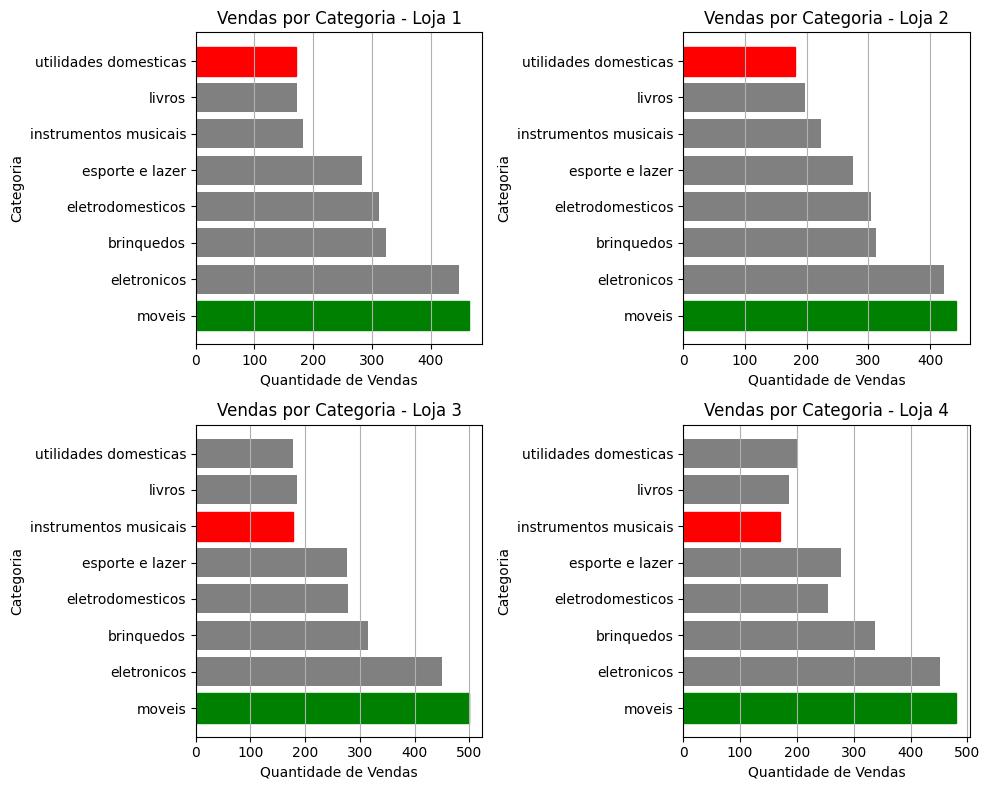

In [ ]:
# Configura o tamanho total da figura (grÃ¡fico maior com 4 subgrÃ¡ficos)
plt.figure(figsize=(10, 8))

# Loop para criar cada grÃ¡fico
for i, loja in enumerate(df_vendas_categoria.columns):
    # Cria um subgrÃ¡fico para cada loja
    plt.subplot(2, 2, i+1)  # A numeraÃ§Ã£o comeÃ§a do 1

    # Obter os valores e categorias
    categorias = df_vendas_categoria.index
    vendas = df_vendas_categoria[loja]

    # Identificar o Ã­ndice do mÃ¡ximo e mÃ­nimo
    max_idx = vendas.idxmax()
    min_idx = vendas.idxmin()

    # Cor padrÃ£o para as barras
    cor_padrao = 'gray'

    # Plotar todas as barras
    bars = plt.barh(categorias, vendas, color=cor_padrao)

    # Colorir a barra do mÃ¡ximo e mÃ­nimo
    bars[categorias.get_loc(max_idx)].set_color('green')  # MÃ¡ximo em verde
    bars[categorias.get_loc(min_idx)].set_color('red')   # MÃ­nimo em vermelho

    # TÃ­tulos e rÃ³tulos do grÃ¡fico
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Categoria')
    plt.title(f'Vendas por Categoria - {loja}')
    plt.grid(axis='x')

# Ajusta o layout para que nÃ£o sobreponha os grÃ¡ficos
plt.tight_layout()

# Exibe o grÃ¡fico
plt.show()



# 3. MÃ©dia de AvaliaÃ§Ã£o das Lojas

In [ ]:
# Cria um dicionÃ¡rio para armazenar as mÃ©dias
medias_avaliacao = {}
medias_avaliacao_produtos = {}

# Loop para calcular a mÃ©dia de cada loja
for i, loja in enumerate(lista_lojas):
    nome_loja = nomes_lojas[i]
    media = round(loja['AvaliaÃ§Ã£o da compra'].mean(), 2)
    medias_avaliacao[nome_loja] = media

# Loop para calcular a mÃ©dia por categoria de produto por loja
for i, loja in enumerate(lista_lojas):
    nome_loja = nomes_lojas[i]
    media_produtos = loja.groupby('Categoria do Produto')['AvaliaÃ§Ã£o da compra'].mean().round(2)
    medias_avaliacao_produtos[nome_loja] = media_produtos

# DataFrame com mÃ©dia geral das lojas
df_media_avaliacao = pd.DataFrame.from_dict(medias_avaliacao, orient='index', columns=['MÃ©dia de AvaliaÃ§Ã£o'])
df_media_avaliacao = df_media_avaliacao.sort_values(by='MÃ©dia de AvaliaÃ§Ã£o', ascending=False)

# DataFrame com mÃ©dia por categoria (transposto para lojas como linhas)
df_media_avaliacao_produtos = pd.DataFrame(medias_avaliacao_produtos).T

# Exibe o resultado
print("ðŸ“Š MÃ©dia de AvaliaÃ§Ã£o das Lojas:")
print(df_media_avaliacao)

# Exibe as 3 categorias melhor avaliadas por loja
for loja, avaliacoes in df_media_avaliacao_produtos.iterrows():
    print(f'\n {loja} - Top 5 categorias melhor avaliadas:')
    top_3 = avaliacoes.sort_values(ascending=False).head(3)
    for categoria, media in top_3.items():
        print(f'   {categoria.title()}: {media}')


ðŸ“Š MÃ©dia de AvaliaÃ§Ã£o das Lojas:
        MÃ©dia de AvaliaÃ§Ã£o
Loja 3                4.05
Loja 2                4.04
Loja 4                4.00
Loja 1                3.98

 Loja 1 - Top 5 categorias melhor avaliadas:
   Brinquedos: 4.08
   Instrumentos Musicais: 4.05
   Eletrodomesticos: 4.03

 Loja 2 - Top 5 categorias melhor avaliadas:
   Moveis: 4.09
   Eletrodomesticos: 4.07
   Utilidades Domesticas: 4.07

 Loja 3 - Top 5 categorias melhor avaliadas:
   Brinquedos: 4.2
   Moveis: 4.1
   Utilidades Domesticas: 4.07

 Loja 4 - Top 5 categorias melhor avaliadas:
   Esporte E Lazer: 4.05
   Livros: 4.04
   Utilidades Domesticas: 4.01


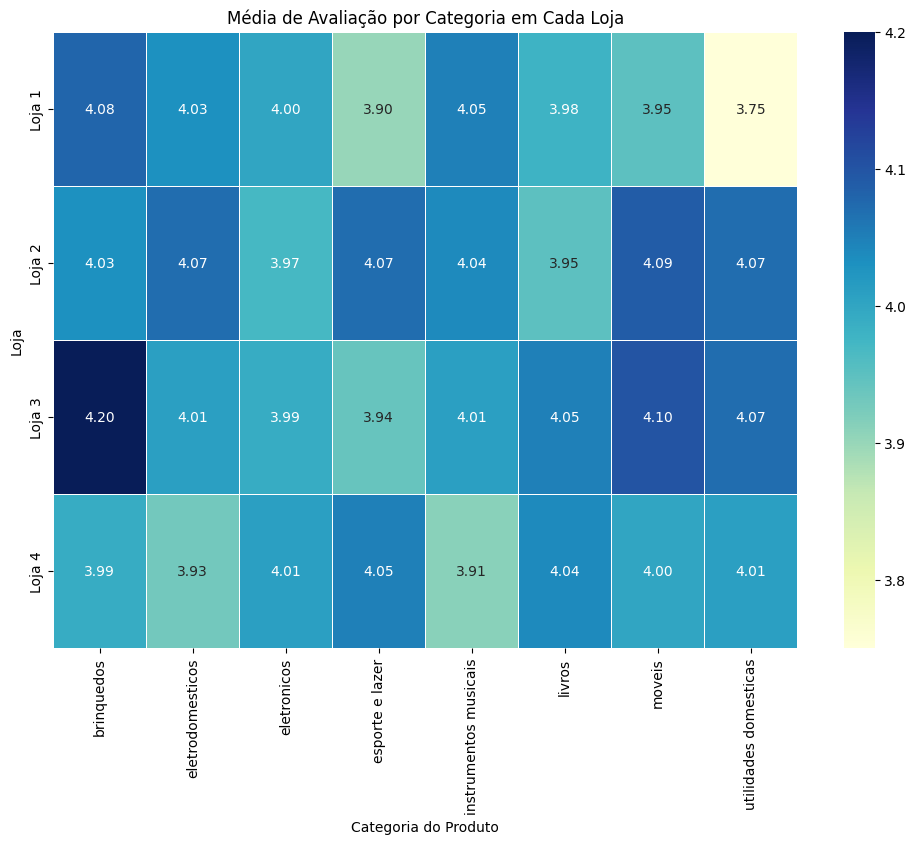

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_media_avaliacao_produtos, annot=True, cmap='YlGnBu', linewidths=.5, fmt=".2f")
plt.title('MÃ©dia de AvaliaÃ§Ã£o por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Loja')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
df_vendas_produtos = pd.DataFrame()

# Loop para contar os produtos vendidos em cada loja
for i, loja in enumerate(lista_lojas):
    qtd_vendas_produtos = loja['Produto'].value_counts()
    df_vendas_produtos[nomes_lojas[i]] = qtd_vendas_produtos

# Mostra os Top 5 e Bottom 5 produtos para cada loja
for loja, qtd in df_vendas_produtos.items():
    print(f'\nðŸ“Œ {loja} - Top 5 produtos:')
    top_3 = qtd.sort_values(ascending=False).head(3)
    for produto, total in top_3.items():
        print(f'  ðŸ›’ {produto.title()}: {total} vendas')

    print(f'\nðŸ“Œ {loja} - Bottom 5 produtos:')
    bottom_3 = qtd.sort_values(ascending=True).head(3)
    for produto, total in bottom_3.items():
        print(f'  ðŸ“‰ {produto.title()}: {total} vendas')


ðŸ“Œ Loja 1 - Top 5 produtos:
  ðŸ›’ Micro-Ondas: 60 vendas
  ðŸ›’ Tv Led Uhd 4K: 60 vendas
  ðŸ›’ Guarda Roupas: 60 vendas

ðŸ“Œ Loja 1 - Bottom 5 produtos:
  ðŸ“‰ Headset: 33 vendas
  ðŸ“‰ Celular Abxy: 33 vendas
  ðŸ“‰ Panela De PressÃ£o: 35 vendas

ðŸ“Œ Loja 2 - Top 5 produtos:
  ðŸ›’ Iniciando Em ProgramaÃ§Ã£o: 65 vendas
  ðŸ›’ Micro-Ondas: 62 vendas
  ðŸ›’ Bateria: 61 vendas

ðŸ“Œ Loja 2 - Bottom 5 produtos:
  ðŸ“‰ Jogo De Tabuleiro: 32 vendas
  ðŸ“‰ Impressora: 34 vendas
  ðŸ“‰ Mesa De Jantar: 34 vendas

ðŸ“Œ Loja 3 - Top 5 produtos:
  ðŸ›’ Kit Banquetas: 57 vendas
  ðŸ›’ Cama King: 56 vendas
  ðŸ›’ Mesa De Jantar: 56 vendas

ðŸ“Œ Loja 3 - Bottom 5 produtos:
  ðŸ“‰ Blocos De Montar: 35 vendas
  ðŸ“‰ Micro-Ondas: 36 vendas
  ðŸ“‰ Mochila: 36 vendas

ðŸ“Œ Loja 4 - Top 5 produtos:
  ðŸ›’ Cama Box: 62 vendas
  ðŸ›’ Faqueiro: 59 vendas
  ðŸ›’ Cama King: 56 vendas

ðŸ“Œ Loja 4 - Bottom 5 produtos:
  ðŸ“‰ Guitarra: 33 vendas
  ðŸ“‰ Guarda Roupas: 34 vendas
  ðŸ“‰ ViolÃ£o: 37 vendas


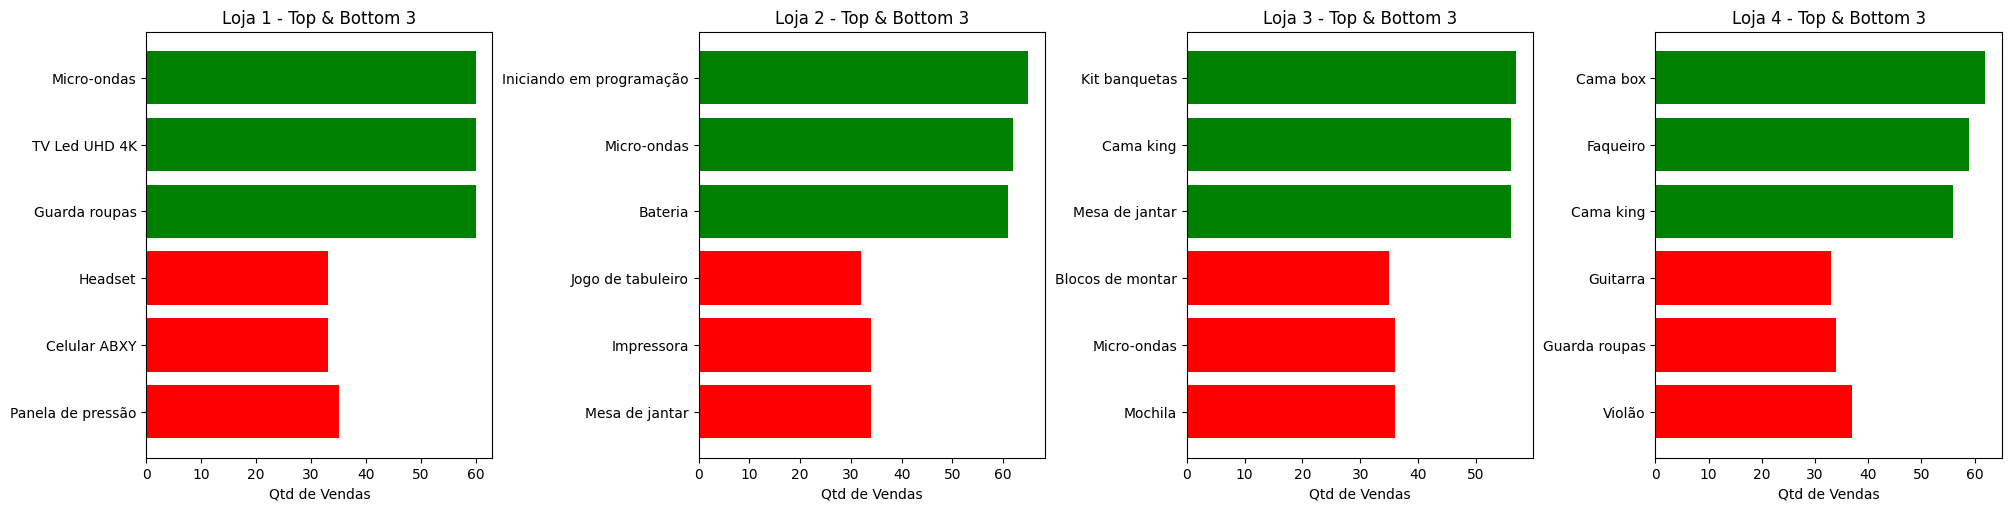

In [ ]:

# Define o nÃºmero de lojas
num_lojas = len(nomes_lojas)

# Cria subplots (um por loja)
fig, axs = plt.subplots(1, num_lojas, figsize=(5*num_lojas, 5), constrained_layout=True)

for i, loja in enumerate(nomes_lojas):
    dados = df_vendas_produtos[loja]
    top_3 = dados.sort_values(ascending=False).head(3)
    bottom_3 = dados.sort_values().head(3)

    # Junta os melhores e piores com concat em vez de append(descontinuado no pandas)
    produtos = pd.concat([top_3, bottom_3])
    cores = ['green']*3 + ['red']*3

    axs[i].barh(produtos.index, produtos.values, color=cores)
    axs[i].set_title(f'{loja} - Top & Bottom 3')
    axs[i].invert_yaxis()  # Top fica em cima
    axs[i].set_xlabel('Qtd de Vendas')

plt.show()


# 5. Frete MÃ©dio por Loja


In [ ]:
lista_frete = []

# Loop sobre os DataFrames
for loja in lista_lojas:
    frete_loja = float(loja['Frete'].mean())
    lista_frete.append(frete_loja)

lista_frete_total = []

for loja in lista_lojas:
    soma_frete = float(loja['Frete'].sum())
    lista_frete_total.append(soma_frete)

# Monta dicionÃ¡rio para organizar por chave e valor
dicionario_frete = dict(zip(nomes_lojas, lista_frete))

# Monta dicionÃ¡rio para organizar por chave e valor
dicionario_frete_total = dict(zip(nomes_lojas, lista_frete_total))

# Exibe a mÃ©dia de frete do maior para o menor
for loja, frete in sorted(dicionario_frete.items(), key=lambda x: x[1], reverse=True):
    print(f'ðŸ“Š A mÃ©dia da {loja.lower()} foi de R${frete:.2f}')

# Exibe a soma de frete do maior para o menor
for loja, frete_total in sorted(dicionario_frete_total.items(), key=lambda x: x[1], reverse=True):
    print(f'\nðŸ“Š A soma dos fretes da {loja.lower()} foi de R${frete_total:.2f}')


ðŸ“Š A mÃ©dia da loja 1 foi de R$34.69
ðŸ“Š A mÃ©dia da loja 2 foi de R$33.62
ðŸ“Š A mÃ©dia da loja 3 foi de R$33.07
ðŸ“Š A mÃ©dia da loja 4 foi de R$31.28

ðŸ“Š A soma dos fretes da loja 1 foi de R$81837.97

ðŸ“Š A soma dos fretes da loja 2 foi de R$79314.16

ðŸ“Š A soma dos fretes da loja 3 foi de R$78022.66

ðŸ“Š A soma dos fretes da loja 4 foi de R$73755.88


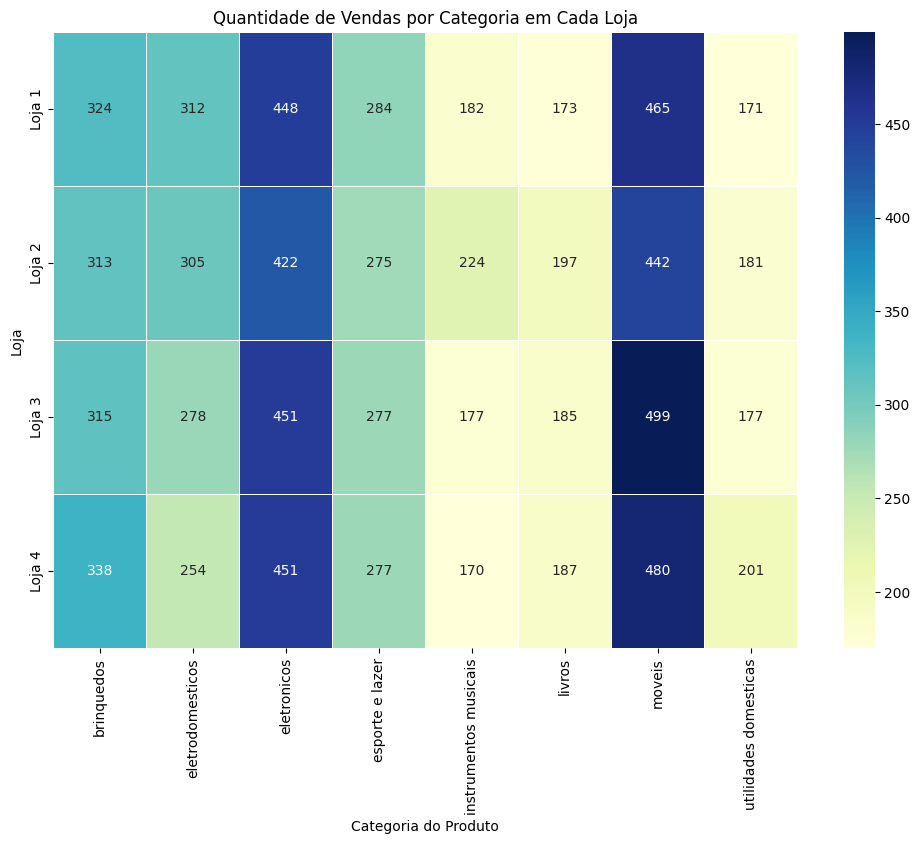

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma lista de dataframes e nomes
lista_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Lista para guardar os dataframes de contagem por loja
dados_heatmap = []

for i, df_loja in enumerate(lista_lojas):
    # Conta quantos produtos foram vendidos por categoria
    contagem = df_loja['Categoria do Produto'].value_counts().reset_index()
    contagem.columns = ['Categoria do Produto', 'Quantidade de Vendas']
    contagem['Loja'] = nomes_lojas[i]
    dados_heatmap.append(contagem)

# Concatena todas as lojas
df_total = pd.concat(dados_heatmap)

# Converte para tabela pivot para o heatmap
df_pivot = df_total.pivot(index='Loja', columns='Categoria do Produto', values='Quantidade de Vendas').fillna(0)

# Cria o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', linewidths=.5, fmt=".0f")
plt.title('Quantidade de Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Loja')
plt.show()


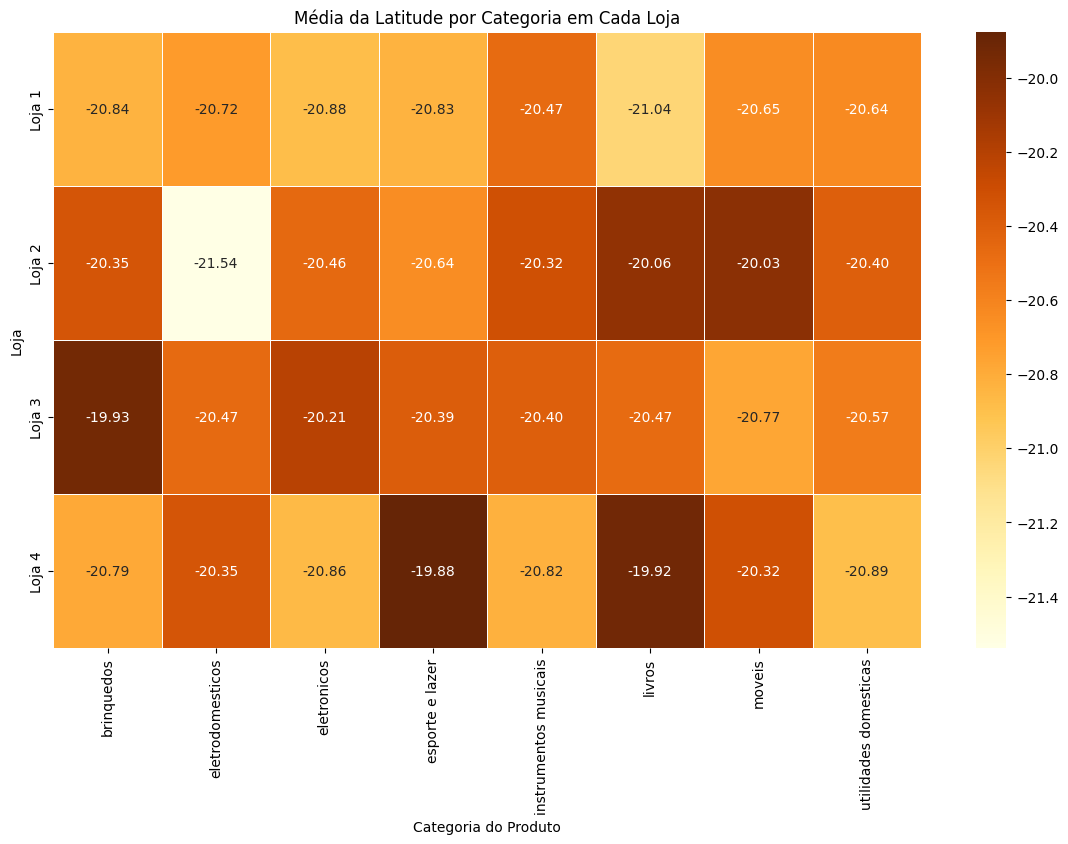

In [ ]:
# Cria um dicionÃ¡rio para guardar os DataFrames
lista_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Lista para armazenar os DataFrames de cada loja com mÃ©dia de latitude por categoria
dados_lat = []

for nome, df in zip(nomes_lojas, lista_lojas):
    medias = df.groupby('Categoria do Produto')['lat'].mean()
    dados_lat.append(medias.rename(nome))

# Concatena os resultados e transpÃµe
df_media_lat = pd.concat(dados_lat, axis=1).T

# Heatmap das mÃ©dias de latitude
plt.figure(figsize=(14, 8))
sns.heatmap(df_media_lat, annot=True, cmap='YlOrBr', linewidths=0.5, fmt=".2f")
plt.title('MÃ©dia da Latitude por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Loja')
plt.show()
